In [9]:
%matplotlib widget
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# read the current data from the csv file
csv_file = Path("downloads.csv") 

read the CSV file into a dataframe

Then create a graph showing the population of each state in the US. The graph should be a bar graph with the state name on the x-axis and the population on the y-axis. The graph should be sorted by population from largest to smallest.


In [10]:
from datetime import datetime


df = pd.read_csv(csv_file, index_col="report_date", parse_dates=True, infer_datetime_format=True)
df = df.rename(columns={"num_downloads": "downloads"}).sort_values(by="downloads", ascending=False)

df.head()


C:\Users\josverl\AppData\Local\Temp\ipykernel_30516\1589912087.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(csv_file, index_col="report_date", parse_dates=True, infer_datetime_format=True)


,downloads,port,board,version,project,version_full
report_date,,,,,,
2023-08-01,851,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0
2023-04-01,777,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0
2023-08-01,764,rp2,pico,1.20.0,micropython-rp2-pico-stubs,1.20.0.post2
2023-05-01,565,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0
2023-07-01,509,stdlib,NaN,NaN,micropython-stdlib-stubs,0.9.0


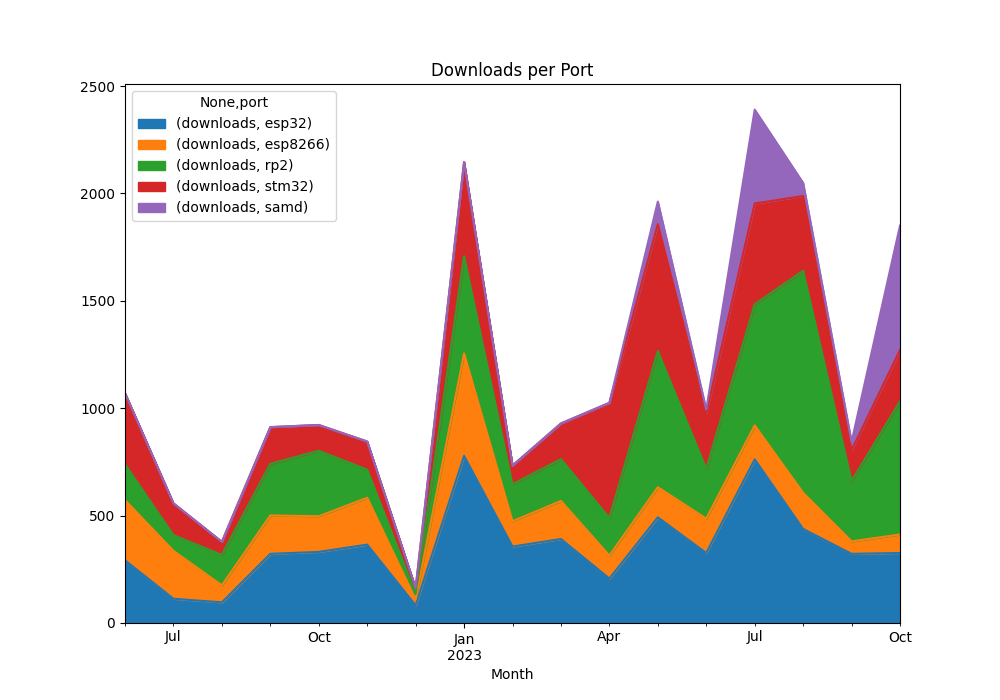

In [11]:
# create a graph of the number of projects downloaded grouped by project, per report_date

# create a new dataframe with the data grouped by month and project
## create a graph based on the information in the dataframe and create a plot that groups by project and shows the downloads per report_date
df_port = df.groupby(["report_date", "port"]).sum(numeric_only=True)
df_port_filtered = df_port[df_port.index.get_level_values('port') != 'stdlib']
# df_port.unstack().plot(kind="area", title="Downloads per Port",xlabel="Month", subplots=True, )
# df_port.unstack().plot(kind="area", title="Downloads per Port",xlabel="Month", stacked=True)
df_port_filtered.unstack().plot(kind="area", title="Downloads per Port",xlabel="Month", stacked=True, table=False, figsize=(10, 7) )
plt.savefig('month_port.png', dpi = 100)


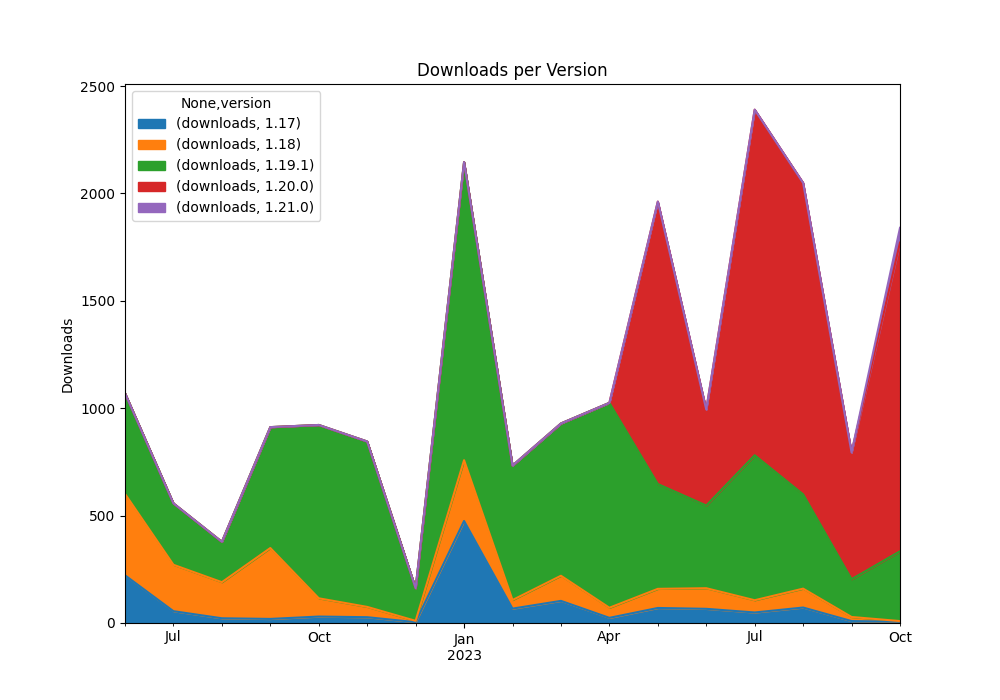

In [19]:
# select only the rows that have a version
df_port = df.groupby(["report_date", "version"]).sum(numeric_only=True)
df_port.unstack().plot(kind="area", title="Downloads per Version", ylabel="Downloads", xlabel="", stacked=True,  table=False, figsize=(10, 7)  )
plt.savefig('month_version.png', dpi = 100)

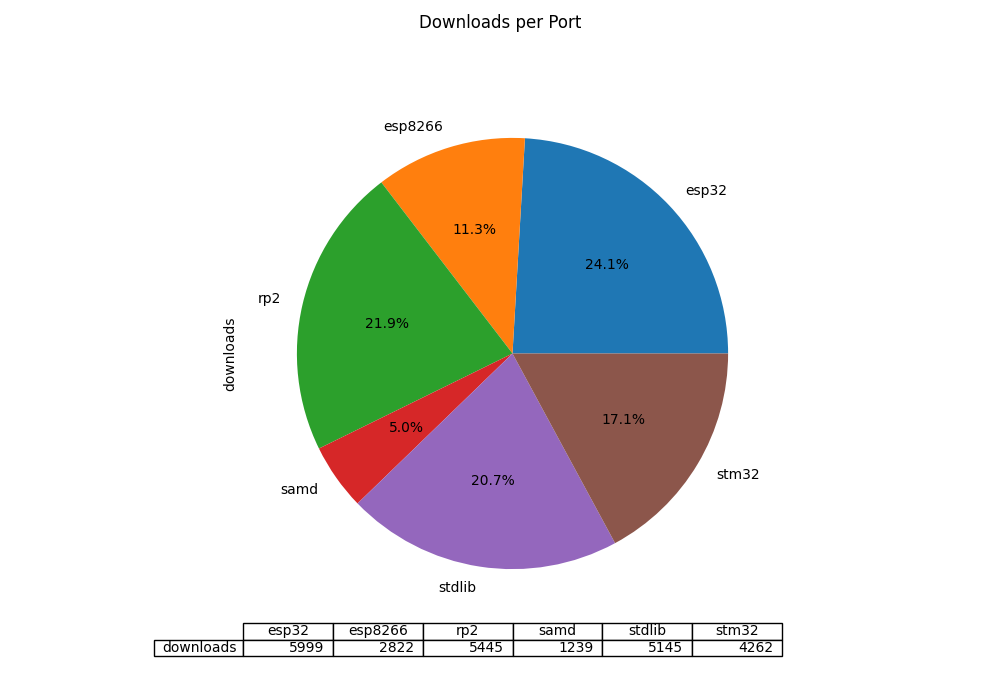

In [20]:
# create a piechart of the number of projects downloaded grouped by port
df_port = df.groupby(["port"]).sum(numeric_only=True)
pie = df_port.plot(kind="pie", title="Downloads per Port",  autopct='%1.1f%%',  legend=False, subplots=True, table=True,  figsize=(10, 7) ) 
plt.savefig('pie_port.png', dpi = 100)